In [3]:
# Importing neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
#from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest
from collections import Counter
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")
import os
from plotly.subplots import make_subplots

#Loading the data

In [4]:
data = pd.read_excel('customer_churn_large_dataset.xlsx')
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


computing the total cost

In [5]:
#totalcost is added
data['total_cost'] = data['Monthly_Bill'] * data['Subscription_Length_Months']
data['total_cost']

0        1247.12
1          48.76
2         427.35
3         293.82
4        1104.66
          ...   
99995    1267.99
99996    1171.35
99997    1633.87
99998     985.00
99999    1454.83
Name: total_cost, Length: 100000, dtype: float64

In [6]:
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,total_cost
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,1247.12
1,2,Customer_2,62,Female,New York,1,48.76,172,0,48.76
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,427.35
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,293.82
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,1104.66
...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1,1267.99
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0,1171.35
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1,1633.87
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1,985.00


# Data Preprocessing

In [7]:
# Features types
data.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
total_cost                    float64
dtype: object

In [8]:
data.shape

(100000, 10)

In [9]:
data.size

1000000

In [10]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,total_cost
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790,811.779157
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998,533.858809
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000,30.060000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000,378.240000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000,726.340000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000,1161.862500
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000,2399.520000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
 9   total_cost                  100000 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 7.6+ MB


# Data Cleaning and Type Conversion

In [12]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
total_cost                    0
dtype: int64

In [13]:
# numerical feature
numerical_feature = {feature for feature in data.columns if data[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 7
Numerical feature are:
 {'total_cost', 'Age', 'Subscription_Length_Months', 'Churn', 'Total_Usage_GB', 'Monthly_Bill', 'CustomerID'}


In [14]:
# Categorical feature
categorical_feature = {feature for feature in data.columns if data[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 3
Categorical feature are:
 {'Name', 'Gender', 'Location'}


In [15]:
encoder = LabelEncoder()
for feature in categorical_feature:
    data[feature] = encoder.fit_transform(data[feature])

In [16]:
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,total_cost
0,1,0,63,1,2,17,73.36,236,0,1247.12
1,2,11112,62,0,4,1,48.76,172,0,48.76
2,3,22223,24,0,2,5,85.47,460,0,427.35
3,4,33334,36,0,3,3,97.94,297,1,293.82
4,5,44445,46,0,3,19,58.14,266,0,1104.66
...,...,...,...,...,...,...,...,...,...,...
99995,99996,99996,33,1,1,23,55.13,226,1,1267.99
99996,99997,99997,62,0,4,19,61.65,351,0,1171.35
99997,99998,99998,64,1,0,17,96.11,251,1,1633.87
99998,99999,99999,51,0,4,20,49.25,434,1,985.00


In [17]:
min(data['Location'])

0

In [18]:
max(data['Location'])

4

In [19]:
min(data['Subscription_Length_Months'])
max(data['Subscription_Length_Months'])

24

In [20]:
print(min(data['Monthly_Bill']))
print(max(data['Monthly_Bill']))

30.0
100.0


In [21]:
print(min(data['Total_Usage_GB']))
print(max(data['Total_Usage_GB']))

50
500


In [22]:
min(data['total_cost'])
max(data['total_cost'])

2399.52

*italicized text*# New Section

# EDA and Data Visualization

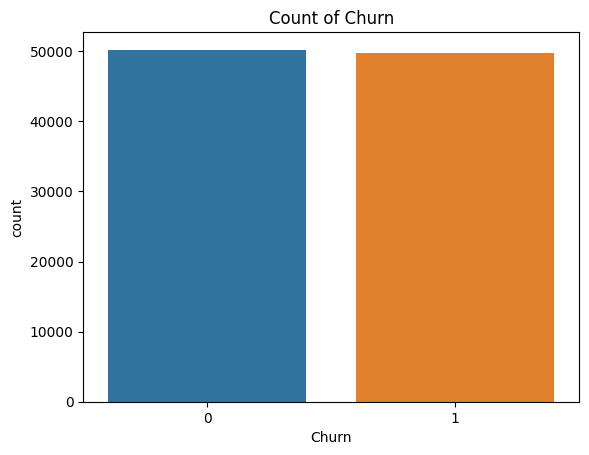

In [148]:
sns.countplot(data=data, x='Churn')
plt.title('Count of Churn')
plt.show()

<Axes: xlabel='Churn', ylabel='Age'>

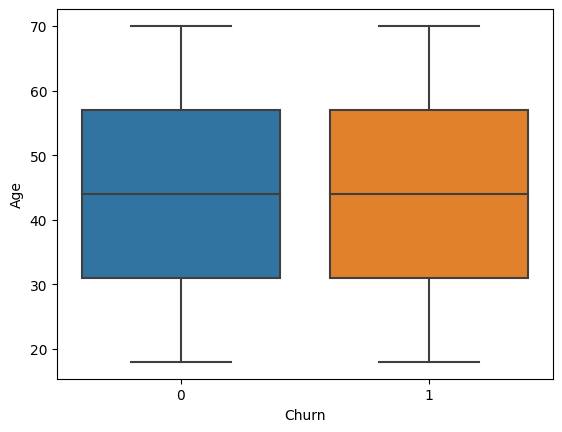

In [164]:
sns.boxplot(x =data.Churn, y = data.Age)

Text(0.5, 1.0, '% Gender')

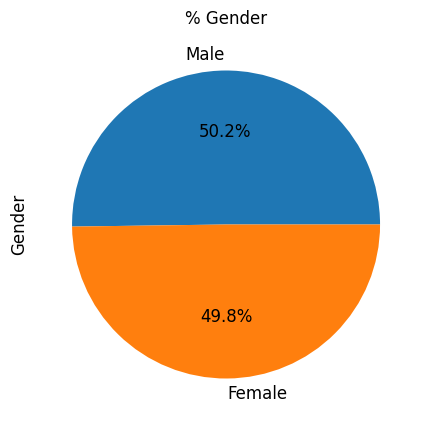

In [162]:
# pie chart for Count of Gender
ax = (data['Gender'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'],figsize =(5,5), fontsize = 12 )
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Gender',fontsize = 12)
ax.set_title('% Gender', fontsize = 12)

In [ ]:
data[['Monthly_Bill', 'total_cost']].plot.scatter(x = 'Monthly_Bill',
                                                              y='total_cost')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

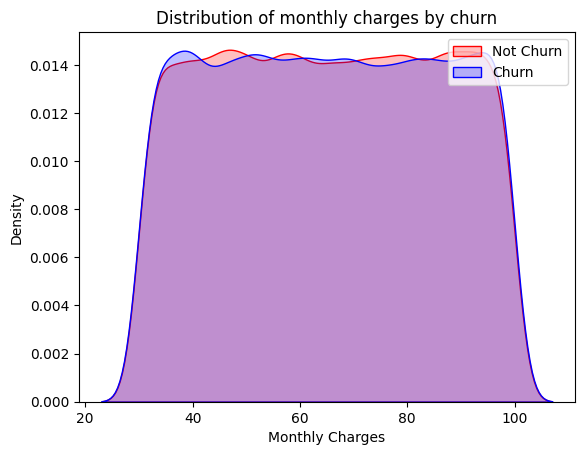

In [165]:
ax = sns.kdeplot(data.Monthly_Bill[(data["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(data.Monthly_Bill[(data["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

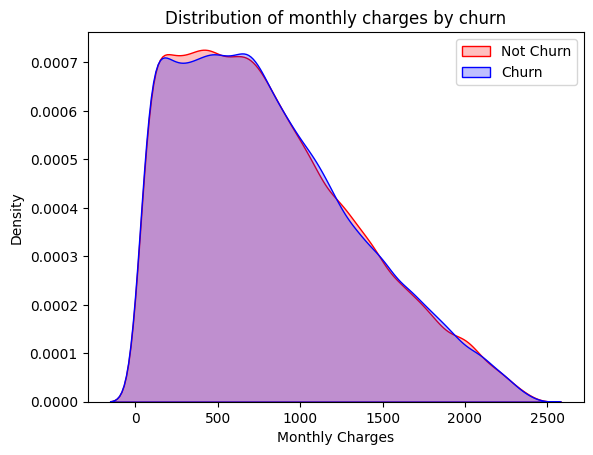

In [166]:
ax = sns.kdeplot(data.total_cost[(data["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(data.total_cost[(data["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

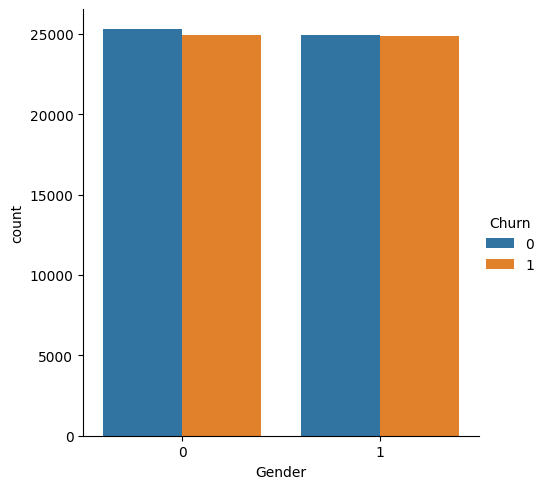

In [168]:
ax1 = sns.catplot(x="Gender", kind="count", hue="Churn", data=data,
                  estimator=lambda x: sum(x==0)*100.0/len(x))
#ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

# Feature Analysis

<Axes: >

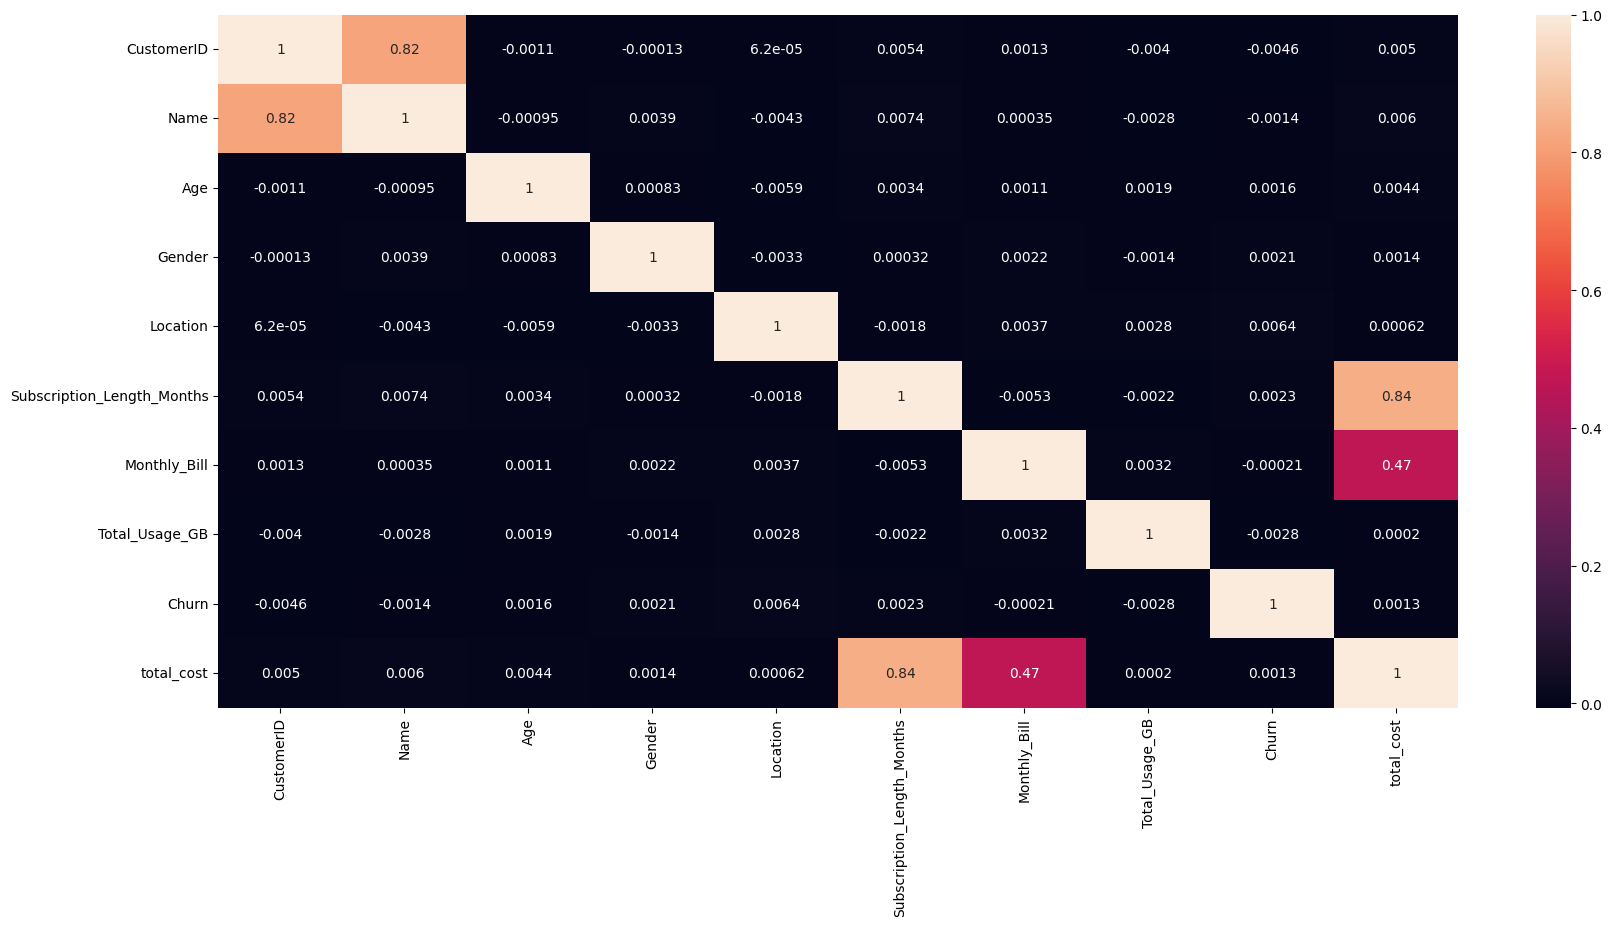

In [23]:
# Finding the correlation between the independent and dependent feature
plt.figure(figsize=(20, 9))
sns.heatmap(data.corr(), annot=True)

# Feature Importance

In [81]:
#from heatmap we can consider the columns: Subscription_Length_Months,Age,Monthly Bill,Total_
# splitting dataset into dependent and independent feature
X = data.drop(['Churn','Name','CustomerID','Subscription_Length_Months',	'Monthly_Bill'], axis=1)
y = data['Churn']
X

,Age,Gender,Location,Total_Usage_GB,total_cost
0,63,1,2,236,1247.12
1,62,0,4,172,48.76
2,24,0,2,460,427.35
3,36,0,3,297,293.82
4,46,0,3,266,1104.66
...,...,...,...,...,...
99995,33,1,1,226,1267.99
99996,62,0,4,351,1171.35
99997,64,1,0,251,1633.87
99998,51,0,4,434,985.00


# Training and Testing the data

In [82]:
# splitting for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model selection

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Choose an appropriate machine learning algorithm
model = RandomForestClassifier()

# Train and validate the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")







Accuracy: 0.5001
Precision: 0.4951020408163265
Recall: 0.490002019793981
F1 Score: 0.4925388285453253


In [ ]:
#LogisticRegression

In [90]:
Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.503
Confusion matrix :
 [[6111 5953]
 [3987 3949]]
Classification report :
               precision    recall  f1-score   support

           0       0.61      0.51      0.55     12064
           1       0.40      0.50      0.44      7936

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.52      0.50      0.51     20000



In [ ]:
#Feature Scaling

In [91]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [89]:

scaler.fit(data.drop(['Churn','CustomerID','Name'],axis=1))
scaled_features=scaler.transform(data.drop(['Churn','CustomerID','Name'],axis=1))

In [112]:
scaled_features.shape

(100000, 7)

In [92]:
from sklearn.model_selection import train_test_split
X=scaled_features
y=data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=44)

In [124]:
X.shape


(100000, 7)

In [93]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [94]:
predR=log_model.predict(X_test)

In [95]:
print(classification_report(y_test,predR,target_names=['Churn Yes','Churn NO']))

              precision    recall  f1-score   support

   Churn Yes       0.51      0.75      0.60     10036
    Churn NO       0.51      0.26      0.35      9964

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.47     20000
weighted avg       0.51      0.51      0.47     20000



In [97]:
confusion_matrix_LR=confusion_matrix(y_test,predR)

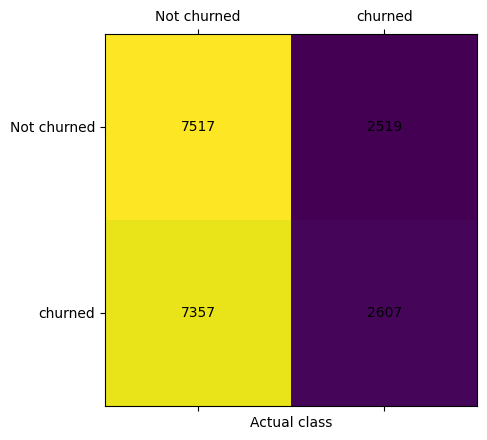

In [98]:
plt.matshow(confusion_matrix(y_test,predR))
#add lables for x and y axis
plt.xlabel('Predicted class')
plt.xlabel('Actual class')
for i in range(2):
    for j in range(2):
        plt.text(j,i,confusion_matrix_LR[i,j],ha='center',va='center')
plt.xticks([0,1],["Not churned","churned"])
plt.yticks([0,1],["Not churned","churned"])
plt.show()

In [99]:
log_model.score(X_train,y_train)

0.5029375

In [100]:
accuracy_score(y_test,predR)

0.5062

In [101]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)

In [102]:
print(classification_report(y_test,predR))

              precision    recall  f1-score   support

           0       0.51      0.75      0.60     10036
           1       0.51      0.26      0.35      9964

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.47     20000
weighted avg       0.51      0.51      0.47     20000



In [103]:
confusion_matrix_dtc=confusion_matrix(y_test,y_pred_dtc)

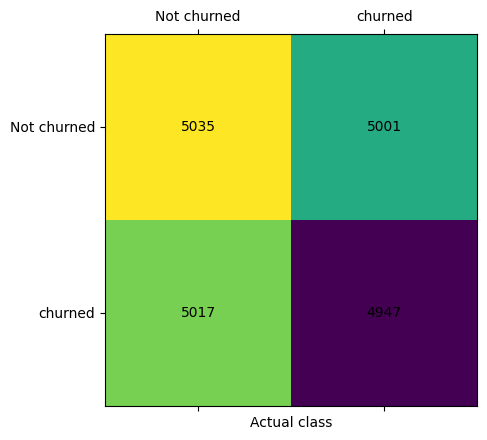

In [104]:
plt.matshow(confusion_matrix_dtc)
#add lables for x and y axis
plt.xlabel('Predicted class')
plt.xlabel('Actual class')
for i in range(2):
    for j in range(2):
        plt.text(j,i,confusion_matrix_dtc[i,j],ha='center',va='center')
plt.xticks([0,1],["Not churned","churned"])
plt.yticks([0,1],["Not churned","churned"])
plt.show()

In [105]:
dtc.score(X_train,y_train)

1.0

In [106]:
accuracy_score(y_test,y_pred_dtc)

0.4991

ModelOptimization



In [107]:
from imblearn.combine import SMOTEENN
st=SMOTEENN()
X_train_st,y_train_st = st.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 40185, 1: 39815})
The number of classes after fit Counter({0: 5140, 1: 5128})


In [109]:
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_st, y_train_st, test_size=0.2)


DecisionTreeClassifier


In [110]:
Dtc_sampling = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=15)
Dtc_sampling.fit(X_train_sap, y_train_sap)
dtc_sampling_pred = Dtc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(dtc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(dtc_sampling_pred, y_test_sap)}')

Accuracy score : 0.5423563777994158
Confusion matrix :
 [[557 497]
 [443 557]]
Classification report :
               precision    recall  f1-score   support

           0       0.56      0.53      0.54      1054
           1       0.53      0.56      0.54      1000

    accuracy                           0.54      2054
   macro avg       0.54      0.54      0.54      2054
weighted avg       0.54      0.54      0.54      2054



Random forest classifier

In [111]:
# Random forest classifier
Rfc_sampling = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')

Accuracy score : 0.6660175267770204
Confusion matrix :
 [[701 387]
 [299 667]]
Classification report :
               precision    recall  f1-score   support

           0       0.70      0.64      0.67      1088
           1       0.63      0.69      0.66       966

    accuracy                           0.67      2054
   macro avg       0.67      0.67      0.67      2054
weighted avg       0.67      0.67      0.67      2054



#Make Predictions

In [146]:
x=data[['Age','Gender','Location','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']]
l=[]

for i in range(0,6):
    if(x.columns[i]=="Subscription_Length_Months"):
        print("Enter "+"Subscription_Length_Months")
        k=float(input())
        l.append(k)
    elif(x.columns[i]=="Monthly_Bill"):
        print("Enter "+"Monthly_Bill")
        m=float(input())
        l.append(m)
    else:
        print("Enter "+x.columns[i])
        z=float(input())
        l.append(z)
    if(x.columns[i]=="Total_Usage_GB"):
        if(z<18 or z>9000):
            print("Invalid input")
            break
    elif(x.columns[i]=="Monthly_Bill" or x.columns[i]=='Subscription_Length_Month'):
        if(z<0 or z>10000):
            print("Invalid input")
            break
    elif(x.columns[i]=="Gender"):
        if(z<0 or z>2):
            print("Invalid input")
            break
    elif(x.columns[i]=="Location"):
         if(z<0 or z>5):
            print("Invalid input")
            break
    elif(x.columns[i]=="Age"):
        if(z<15 or z>150):
            print("Invalid input")
            break


total_cost=k*m
l.append(total_cost)
l=np.array(l).reshape(1,-1)
solution=Rfc_sampling.predict(l)
if(solution==1):
    print("Customer is likely to churn!")
else:
    print("Customer is not likely to churn")


Enter Age
23
Enter Gender
1
Enter Location
2
Enter Subscription_Length_Months
32
Enter Monthly_Bill
32
Enter Total_Usage_GB
322
Customer is not likely to churn
